# Customer Churn EDA 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/Users/ravina/Desktop/CustomerChurnPrediction/Customer-Churn-Records.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

# Basic Observation:
1. dataset contains 10000 customer's data.
2. dataset contains 17 columns with 16 feature columns and one target column  named "Exited".
3. None of the column contains null values.
4. there ae no duplicates in the data.


# Discriptive statistical analysis of the whole dataset for numerical features is given below which provide the five number summary,count, mean,median,mode of the data.


In [7]:

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [112]:
df1=df.copy()

In [113]:
df1.drop(columns=["RowNumber","CustomerId",'Surname'],inplace=True)


In [114]:
df1["HasCrCard"] = df1["HasCrCard"].astype(str)
df1['IsActiveMember']=df1['IsActiveMember'].astype(str)
df1['Satisfaction Score']=df1['Satisfaction Score'].astype(str)
df1['NumOfProducts']=df1['NumOfProducts'].astype(str)


In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  object 
 7   HasCrCard           10000 non-null  object 
 8   IsActiveMember      10000 non-null  object 
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  object 
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 1.1+ 

In [116]:
print(df.shape[1])
print(df1.shape[1])

18
15


# Target column

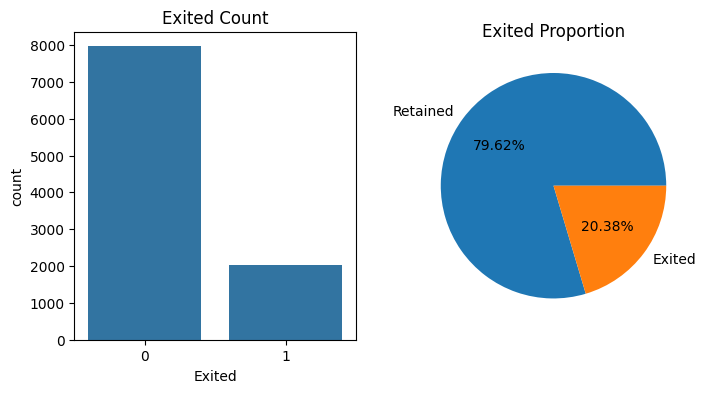

Exited
0    7962
1    2038
Name: count, dtype: int64


In [117]:

import seaborn as sns 
val_count=df1['Exited'].value_counts()
labels = 'Retained','Exited'

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=df1, x='Exited',ax=ax[0])
ax[0].set_title('Exited Count')

ax[1].pie(val_count, labels=labels, autopct='%2.2f%%')
ax[1].set_title('Exited Proportion')

plt.show()

print(val_count)

# Imbalanced Data

1. 2038 number of the customers churned in the given data. non churners are more than three times the churners which make the data highly imbalanced.
2. In percentage 79.62% customers retained wherease 20.38% churned.
3. Given 20.4% is a small number, we need to ensure that the chosen model predict with great accuracy this 20.4% of the churned customers. As it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

In [118]:
# Categorical and numerical features
import numpy as np

num_col = df1.select_dtypes(include=['number']).columns.tolist()
cat_col = df1.select_dtypes(include=['object']).columns.tolist()
print(cat_col)
print(num_col)

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Satisfaction Score', 'Card Type']
['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited', 'Complain', 'Point Earned']


# Analysis of numerical features

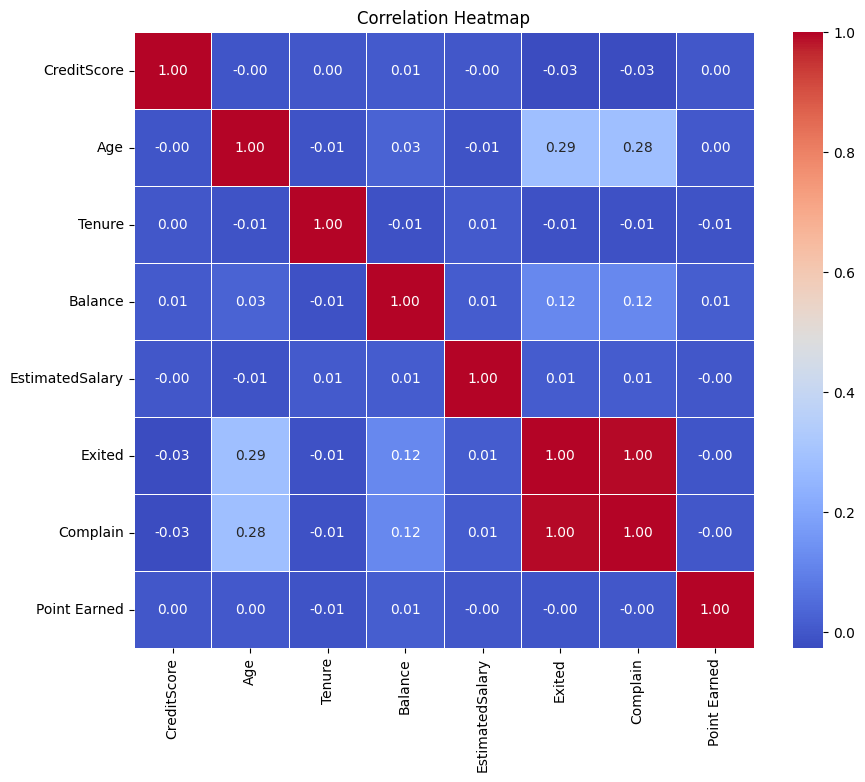

In [119]:
cor = df[num_col].corr()

# Create heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# Observation:
1. Complain is have 100% corelation with target column "Exited", therefore column "Complain" will not provide any information about the churn of customer. we will drop this feature.
2. Age of the customer and their tendency to churn have positive corealtion.

In [120]:
df1.drop(columns=["Complain"],inplace=True)

In [121]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [123]:

num_col = df1.select_dtypes(include=['number']).columns.tolist()
num_col

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'EstimatedSalary',
 'Exited',
 'Point Earned']

<Axes: xlabel='Point Earned', ylabel='Count'>

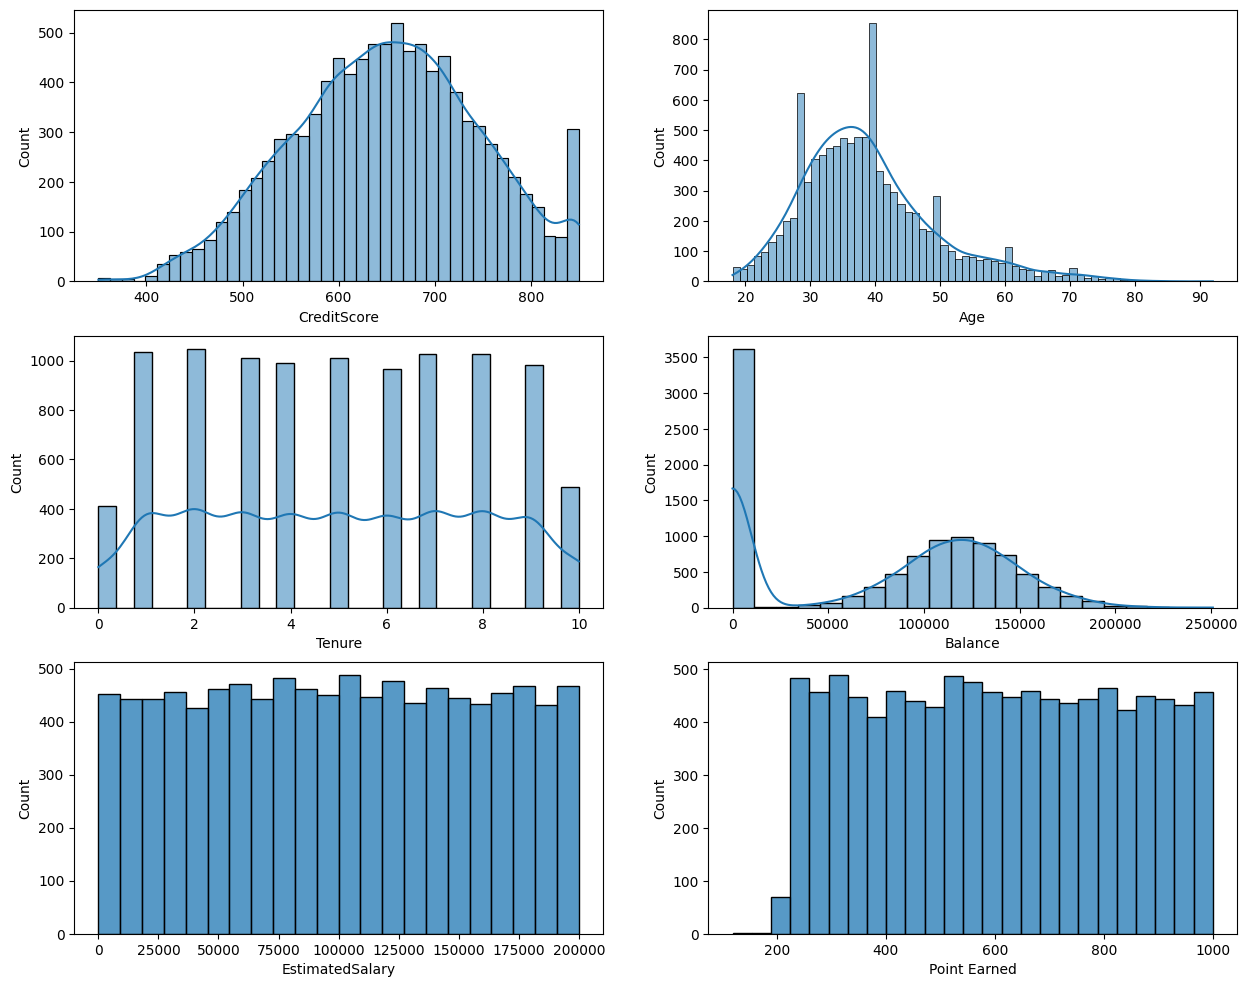

In [124]:
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x = df['CreditScore'], kde = True)

plt.subplot(3, 2, 2)
sns.histplot(x = df['Age'], kde = True)

plt.subplot(3, 2, 3)
sns.histplot(x = df['Tenure'], kde = True)

plt.subplot(3, 2, 4)
sns.histplot(x = df['Balance'], kde = True)

plt.subplot(3, 2, 5)
sns.histplot(x = df['EstimatedSalary'])

plt.subplot(3, 2, 6)
sns.histplot(x = df['Point Earned'])

## Observation

- The estimated salary shows practically the same number of people for each salary range.
- The variable `PointEarned` exhibits near to balanced distribution.
- `CreditScore` and `Age` shows a non-perfect normal distribution.
- The `Balance` variable indicates that most data points are from people with zero balance in their accounts.

<Axes: xlabel='Exited', ylabel='Point Earned'>

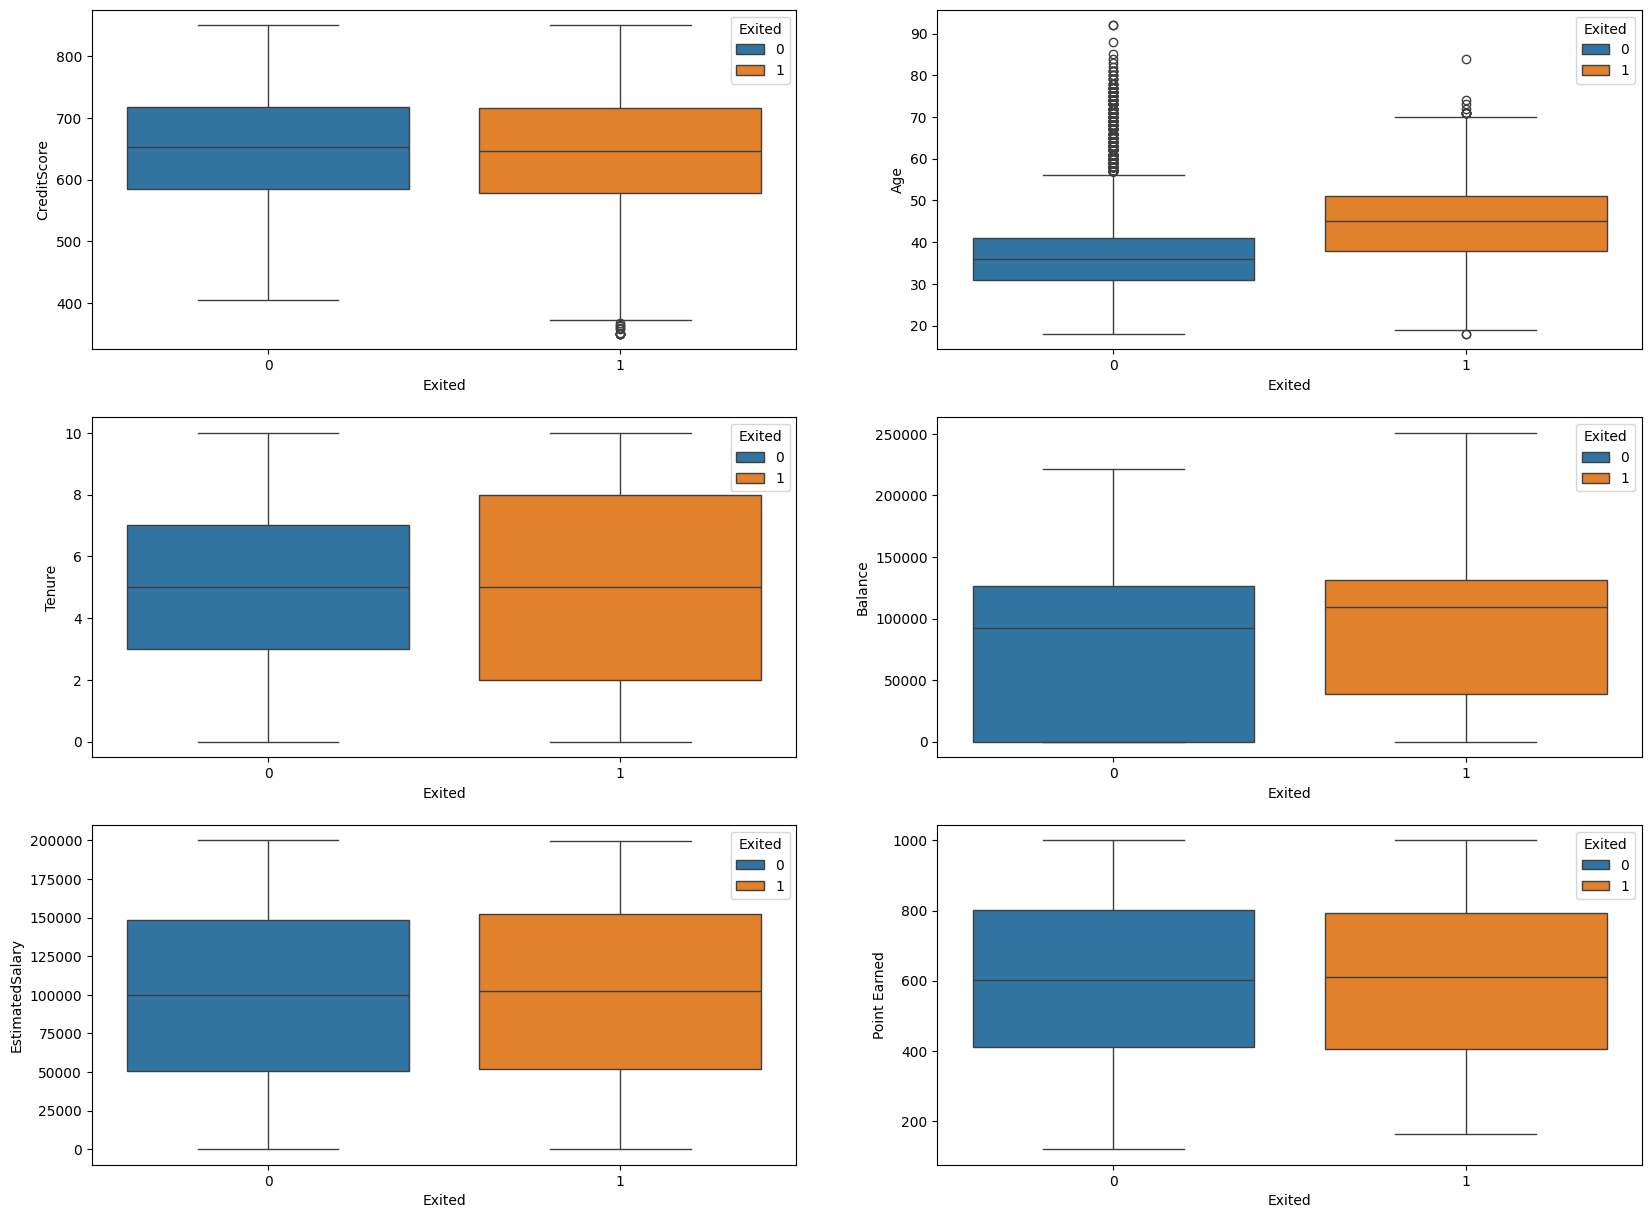

In [127]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 15))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df1 , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[1][1])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[2][0]) 
sns.boxplot(y='Point Earned',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[2][1])    

## observation:
1. IQR of credit score for churners and non churners is approximately same, but churners have some outliers below lower fence with credit score less than 350.  
2. Age have significant effact on churning tendency, most of the churners are above 35 age.
3. There are both type of churned customers  with low tenure and high tenure values.
4. The bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
5. none of the features 'EstimatedSalary','Point Earned' have any observed effect on the churn tendency of the customer.

# Categorical Features

In [128]:
val_count=[]
for i in cat_col:
    val_count.append(df[i].value_counts())


print(val_count)
df1.describe(include=object)

[Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64, Gender
Male      5457
Female    4543
Name: count, dtype: int64, NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64, HasCrCard
1    7055
0    2945
Name: count, dtype: int64, IsActiveMember
1    5151
0    4849
Name: count, dtype: int64, Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64, Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64]


,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Satisfaction Score,Card Type
count,10000,10000,10000,10000,10000,10000,10000
unique,3,2,4,2,2,5,4
top,France,Male,1,1,1,3,DIAMOND
freq,5014,5457,5084,7055,5151,2042,2507


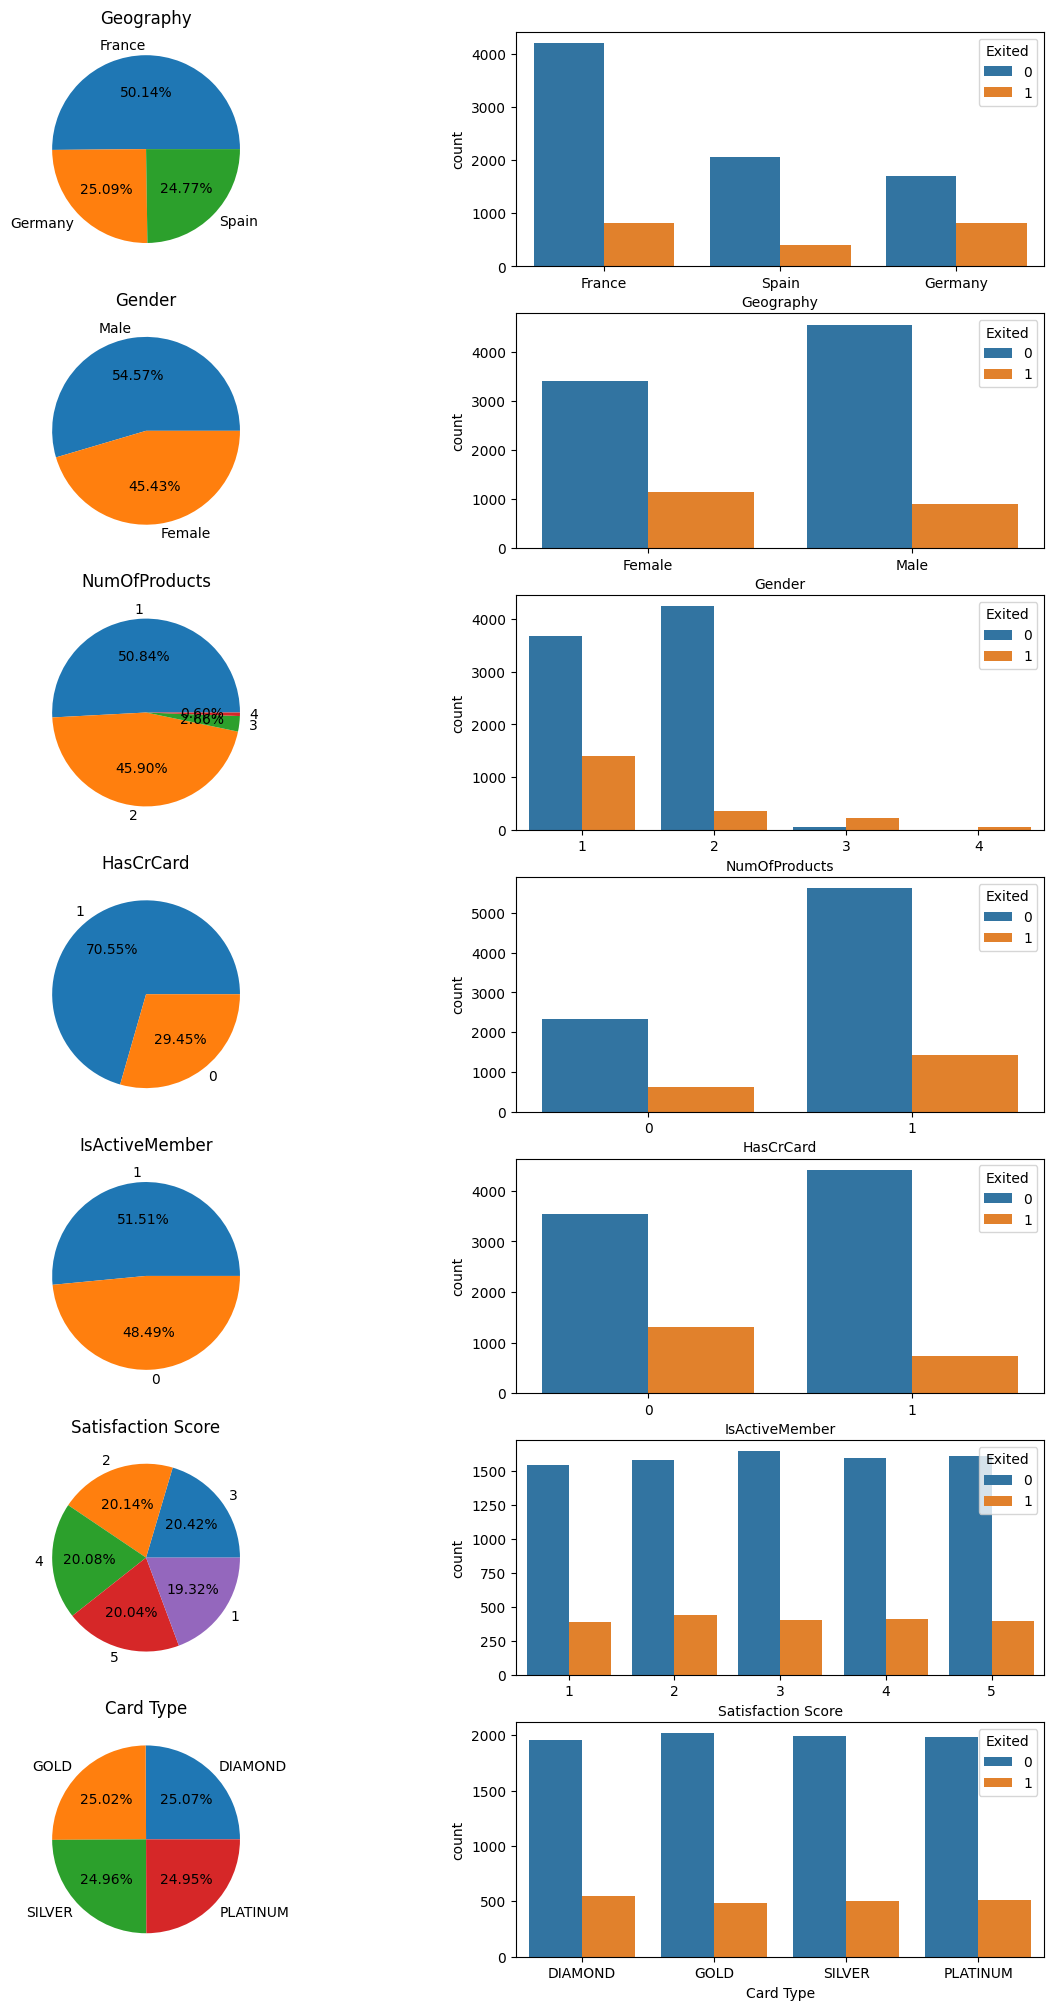

In [131]:
import seaborn as sns 

fig, ax = plt.subplots(7, 2, figsize=(15, 25))

ax[0][0].pie(val_count[0], labels=val_count[0].index, autopct='%2.2f%%')
ax[0][0].set_title("Geography")
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=ax[0][1])

ax[1][0].pie(val_count[1], labels=val_count[1].index, autopct='%2.2f%%')
ax[1][0].set_title('Gender')
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=ax[1][1])

ax[2][0].pie(val_count[2], labels=val_count[2].index, autopct='%2.2f%%')
ax[2][0].set_title('NumOfProducts')
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df, ax=ax[2][1])

ax[3][0].pie(val_count[3], labels=val_count[3].index, autopct='%2.2f%%')
ax[3][0].set_title('HasCrCard')
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=ax[3][1])

ax[4][0].pie(val_count[4], labels=val_count[4].index, autopct='%2.2f%%')
ax[4][0].set_title('IsActiveMember')
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=ax[4][1])

ax[5][0].pie(val_count[5], labels=val_count[5].index, autopct='%2.2f%%')
ax[5][0].set_title('Satisfaction Score')
sns.countplot(x='Satisfaction Score', hue = 'Exited',data = df, ax=ax[5][1])

ax[6][0].pie(val_count[6], labels=val_count[6].index, autopct='%2.2f%%')
ax[6][0].set_title('Card Type')
sns.countplot(x='Card Type', hue = 'Exited',data = df, ax=ax[6][1])

plt.show()

    



# Discriptive statistics and EDA of Categorical features:

1. More than half of the customers belongs to France. According to the geographical proportion of the data, customers from Germany churned the most. France and Spain have approximately equal number of churners.
2. We have more number of male customer's data than female. Female customers tends to churn more than the male customers.
3. Customers using 1,3,4 numbers of product have high churning tendencies.
4. Around 70% of the cusomers have credit card and rest doesn't. Having Credit card or not doesn't have any significant effect on churning rate. Proportion of churners is similar whether they have credit card or not.
5. ASpproximately 50% of the customers are not active and Non active customers tend to churn more.
6. Satisfaction and Card typr doesn't have any effect on churning rate. all the card type categories have approximately same number of churners.

# in file "research/Rough_model_Building.ipynb" we will perform feature tansformation, feature engineering, feature selection and model buildinng part.